In [44]:
import pandas as pd
import numpy as np
import re # code removes punctuation, 'br' tags, capital letters, stop words, symbols
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


#review_dataframe = pd.read_csv("IMDB Dataset.csv")
review_dataframe = pd.read_csv('./IMDB Dataset.csv', na_values=["n/a", "NaN", "Na", "", " "])
review_dataframe.info() # to check whether there are any null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [45]:
review_dataframe.head() # view the data set

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
# check for and remove any duplicates in the data set
duplicated_data = review_dataframe[review_dataframe.duplicated()]
print(duplicated_data)

                                                  review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]


In [47]:
temp_df = review_dataframe.append(review_dataframe) # checking for duplicates
temp_df.shape

C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\2683112229.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = review_dataframe.append(review_dataframe) # checking for duplicates


(100000, 2)

In [48]:
#temp_df = temp_df.drop_duplicates() # removes any duplicates 
#temp_df.shape

review_dataframe = review_dataframe.drop_duplicates()
review_dataframe.shape

(49582, 2)

In [49]:
review_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [50]:
# code to pre-process data
stop = stopwords.words('english')
# converts text to lowercase
review_dataframe.loc[:,"review"] = review_dataframe.review.apply(lambda x: str.lower(x))
# removes the punctuation from the code
review_dataframe.loc[:,"review"] = review_dataframe.review.apply(lambda x : " ".join(re.findall('[\w]+',x)))
# removes remaining 'br' from the code after removing punctuation 
review_dataframe['review'] = review_dataframe['review'].str.replace(r'br', '', regex=True)
# remove the numbers from the reviews
review_dataframe['review'] = review_dataframe['review'].str.replace('\d+', '')
# applies top variable to remove any stop words
review_dataframe['review'] = review_dataframe['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(review_dataframe)

C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3166895390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataframe.loc[:,"review"] = review_dataframe.review.apply(lambda x: str.lower(x))
C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3166895390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataframe.loc[:,"review"] = review_dataframe.review.apply(lambda x : " ".join(re.findall('[\w]+',x)))
C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3166895390.py:8: SettingWithCopyWarnin

                                                  review sentiment
0      one reviewers mentioned watching oz episode ho...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically family little boy jake thinks zombie...  negative
4      petter mattei love time money visually stunnin...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  going disagree previous comment side maltin on...  negative
49999  one expects star trek movies high art fans exp...  negative

[49582 rows x 2 columns]


C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3166895390.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataframe['review'] = review_dataframe['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [51]:
# tokenizes the text into individual words 
review_dataframe['review'] = review_dataframe['review'].apply(lambda text: text.split())
review_dataframe.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [52]:
# method to stem the words using import stemmer from lab 
# returns stemmed words after checking each words in the review olumn
def stemming(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

review_dataframe['review'] = review_dataframe['review'].apply(stemming)
review_dataframe.head()

,review,sentiment
0,"[one, review, mention, watch, oz, episod, hook...",positive
1,"[wonder, littl, product, film, techniqu, unass...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, famili, littl, boy, jake, think, zombi...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive


Validation Accuracy of KNN:  0.7022939248802622


C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3103535208.py:30: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_training_val = X_training.append(X_val)
C:\Users\keliz\AppData\Local\Temp\ipykernel_10224\3103535208.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_training_val = y_training.append(y_val)


K-Fold Cross-validation Scores: [0.71187295 0.71288127 0.70229392 0.72422486 0.71817494 0.71961674
 0.71709531 0.70625315 0.72592032 0.702471  ]
Mean Accuracy: 0.71
Standard Deviation: 0.01
Testing Accuracy of KNN: 0.7153372995865686


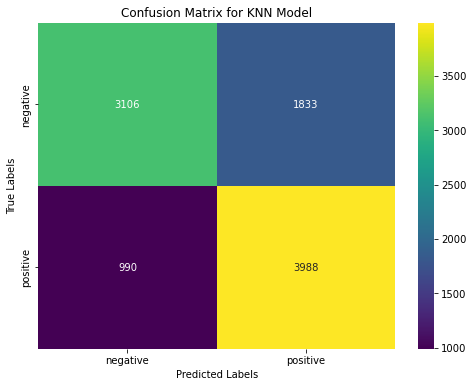

F1 Score of KNN: 0.7131680225117569


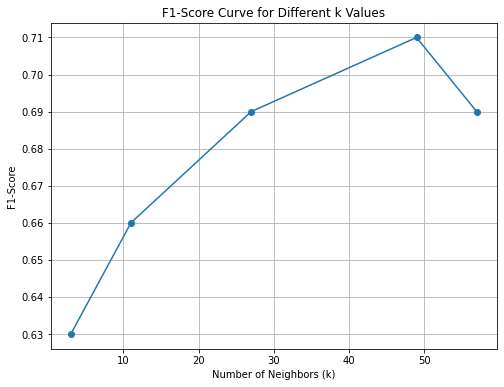

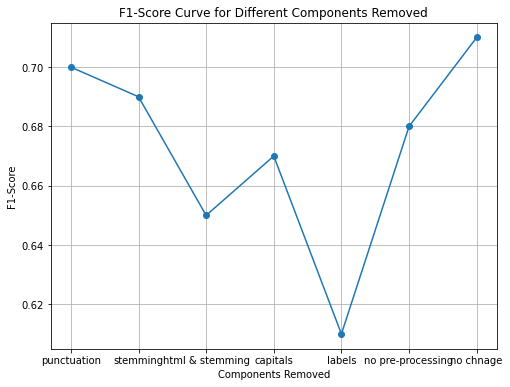

In [54]:
# joins text to remove list of objects error - affects tokenization
review_dataframe['review'] = review_dataframe['review'].apply(lambda x: ' '.join(x))

# 80% train and 20% test
X_training, X_testing, y_training, y_testing = train_test_split(review_dataframe['review'], review_dataframe['sentiment'], test_size=0.2,  random_state=42)
# 10% assigned for validation
X_training, X_val, y_training, y_val = train_test_split(X_training, y_training, test_size=0.1, random_state=42)

# vectorize data into numerical values
vectorizer = CountVectorizer()

# vectorize all subsets
X_training_vec = vectorizer.fit_transform(X_training)
X_val_vec = vectorizer.transform(X_val)
X_testing_vec = vectorizer.transform(X_testing)

# assign name to classifier with k value of 49
knn = KNeighborsClassifier(n_neighbors=49)  # You can adjust the number of neighbors

# train knn model with the training set
knn.fit(X_training_vec, y_training)

# make a prediction with validation set
y_pred_val = knn.predict(X_val_vec)

# accuracy of validation
validation_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy of KNN: ", validation_accuracy)


X_training_val = X_training.append(X_val)
y_training_val = y_training.append(y_val)


# vectorize training and validation sets
vectorizer = CountVectorizer()
X_training_val_vec = vectorizer.fit_transform(X_training_val)

knn = KNeighborsClassifier(n_neighbors=49)  # You can adjust the number of neighbors

# k-fold cross validation calculations evaluating accuracy scores 
kcv_scores = cross_val_score(knn, X_training_val_vec, y_training_val, cv=10, scoring='accuracy')

# cross-validate the results
print("K-Fold Cross-validation Scores:", kcv_scores)

# standard deviation and mean accuracy calculations for distributions
mean_accuracy = kcv_scores.mean()
std_accuracy = kcv_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# train knn with the validation and training data sets
knn.fit(X_training_val_vec, y_training_val)

# test data is vectorized to numerical form
X_testing_vec = vectorizer.transform(X_testing)

# knn predicts sentiment 
y_pred_test = knn.predict(X_testing_vec)

# accuracy of test scores from analysing test set
accuracy_level = accuracy_score(y_testing, y_pred_test)
print("Testing Accuracy of KNN:", accuracy_level)

# fit model for final predictions
knn.fit(X_training_val_vec, y_training_val)
y_pred_test = knn.predict(X_testing_vec)

# confusion maxtrix using the import 
confusion_matrix1 = confusion_matrix(y_testing, y_pred_test)

# confusion matrix as a viridis heatmap (changed to make more visual)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='viridis', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

# F1-Score calculations with weighted precision and recall
f1 = f1_score(y_testing, y_pred_test, average='weighted')
print("F1 Score of KNN:", f1)

# values for experimentation of k and the affect on the F1-Score
k_values =[3, 11, 27, 49, 57]
f1_scores =[0.63, 0.66, 0.69, 0.71, 0.69]

plt.figure(figsize=(8, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')  # line graphs
plt.title('F1-Score Curve for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()

# ablation study to show how different processes affected the overall accuracy 
components_removed =['punctuation', 'stemming', 'html & stemming', 'capitals', 'labels', 'no pre-processing', 'no chnage']
f1_score_changes =[0.70, 0.69, 0.65, 0.67, 0.61, 0.68, 0.71]

# graphs plots the values above with circular point markers for each value (done as a line graph)
plt.figure(figsize=(8, 6))
plt.plot(components_removed, f1_score_changes, marker='o', linestyle='-')
plt.title('F1-Score Curve for Different Components Removed')
plt.xlabel('Components Removed')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()
